# Sistemas Dinámicos

Un sistema dinámico es una función o un conjunto de funciones. El ejemplo más común es la logística y mapeo de telaraña es la forma más usual para analizarlo.

$$f:\mathcal{X} \rightarrow \mathcal{X}$$

<img src="./cobweb.png" width=50%>

Hay dos tipos de sistemas dinámicos: aquellos de caracter continuo, a los que llamamos **flujos** y son sistemas de ecuaciones diferenciales, y los de caracter discreto a los que llamamos **mapeos** de los cuales únicamente tenemos actualizaciones en pasos fijos de tiempo, es decir, si comenzamos con un punto inicial $x_0$ y una función $f$.

$$ \lbrace x_0, f(x_0), f(f(x_0)), \ldots, f(\ldots (f(x_0))\ldots) \rbrace $$

El mapeo de telaraña funciona de la siguiente forma: Se traza la curva del mapeo y nos fijamos en las intersecciones de esta con la identidad $f(x) = x$, después lo que hacemos es trazar la proyección en el eje de las abscisas de la identidad a nuestra función para después la proyección en el eje de las ordenadas a la identidad, de vuelta.

## Lotka - Volterra

Un flujo muy conocido es el sistema de ecuaciones diferenciales que modela la interacción ecológica de dos especies: una depredadora $D$ de la otra $P$. La dinámica de las presas se modela como

$$\dot P = \alpha P - \beta DP$$

Que se puede interpretar como la taza de cambio en la población de $P$ es positiva en ausencia de otra interacción, es decir, las presas comen y se reproducen mientras no se encuentren con un depredador ($\alpha$) pero en cuanto se encuentran con un depredador entonces esto afecta negativamente a la población de presas ($\beta$).

En cuanto a los depredadores el modelado funciona de manera complementaria:

$$\dot D = -\gamma D + \delta DP$$

Es decir, en ausencia de interacciones los depredadores se mueren a cierta taza de cambio ($-\gamma$) pero si un depredador se encuentra con una presa entonces eso se pondera positivamente a la población de depredadores ($\delta$). 

El sistema en su conjunto se ve de la siguiente forma:

$$
\begin{align}
\dot P =& P(\alpha  - \beta D)   \\
\dot D =& -D(\gamma - \delta P)
\end{align}
$$

Lo que usualmente se requiere con un sistema de ecuaciones diferenciales es el recuperar la secuencia de puntos que satisfacen nuestro sistema dinámico y esto se logra resolviendo el sistema de ecuaciones. En este caso la solución al sistema de ecuaciones se hace mediante integración numérica. 

In [1]:
from numpy import arange, zeros, array
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from celluloid import Camera
import seaborn as sns
from IPython.display import HTML

In [2]:
## sistema lotka volterra
## parametros alfa = 0.4, beta = 0.018, gamma=0.8 delta=0.023
def lv(r, alfa=0.4, beta=0.018, gamma=0.8, delta=0.023):
    (x, y) = r
    dp_dt = alfa*x - beta*x*y
    dd_dt = -gamma*y + delta*x*y

    return [dp_dt, dd_dt]

## Método de Euler para hacer integración numérica
## Regresa el siguiente punto empezando en un punto inicial
## y con una dinámica especificada, h es un parámetro para
## definir el tamaño del paso.
def euler(f, r0, h, N):
    k = len(r0)
    P = zeros((N,k))
    P[0] = r0
    for i in range(1,N):
        pa = P[i-1]
        P[i] = pa + h*array(f(pa))
    return P



In [3]:
# Posicion inicial
r0 = [30, 1]

#Intervalo de tiempo
tf = 100.0
h = 0.0001
t=arange(0,tf,0.0001)


#solucion del sistema
#pos = odeint(f, r0, t)
pos = euler(lv, r0, h, len(t))
x = pos[:, 0]
y = pos[:, 1]
print("* calculado 1er sistema - azul")

r1 = [10,20]
pos2 = euler(lv, r1, h, len(t))
x2 = pos2[:,0]
y2 = pos2[:,1]
print("* calculado 2o sistema - rojo")

r2 = [5,5]
pos3 = euler(lv, r2, h, len(t))
x3 = pos3[:,0]
y3 = pos3[:,1]
print("* calculado 3er sistema - negro")


* calculado 1er sistema - azul
* calculado 2o sistema - rojo
* calculado 3er sistema - negro


Una vez que el método ha terminado podemos graficar las soluciones una contra la otra para ver cómo se ve la solución.

Text(0, 0.5, 'D')

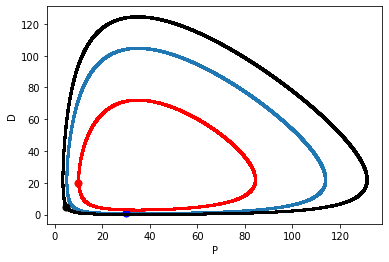

In [5]:
plt.scatter(x,  y, s=1)
plt.scatter(r0[0], r0[1], c='b', s=50)
plt.scatter(x2, y2, c='r', s=1)
plt.scatter(r1[0], r1[1], c='r', s=50)
plt.scatter(x3, y3, c='k', s=1)
plt.scatter(r2[0], r2[1], c='k', s=50)
plt.xlabel('P')
plt.ylabel('D')

## Mapeo Logístico

El ejemplo más visitado de este tipo de sistemas por su estructura sencilla es el que denominamos mapeo logístico. Es un modelo poblacional, cantidad modelada por la variable $x$ al tiempo $n$ ($x_n$) y que puede tomar valores entre 0 y 1,  y el parámetro $r$. La forma del mapeo es como sigue: 

$$ x_{n+1} = k  x_n \cdot (1 - x_n) $$

Y salta que para valores pequeños de $x_n$ entonces tenemos una relación lineal:

$$ x_{n+1} \approx k \cdot x_n $$

Sin embargo cuando los valores de $x_n$ crecen entonces la relación no lineal en el término cuadrático es más significativa

¿Cómo se comporta entonces $x_n$ para diferentes valores de $k$?

In [6]:
def logistica(N,r,x0):
    """
    Mapeo logístico. 
    N: Cantidad de puntos
    r: parametro
    x0: punto inicial
    """
    L = [x0]
    for i in range(1,N):
        xact = L[-1]
        xnvo = r*xact*(1-xact)
        L.append(xnvo)
    return L


Vamos a graficar la evolución de la población para diferentes valores de $r$. 

$r = 1$


In [7]:
x = np.random.random()
r = 1
C = logistica(1000, r, x)

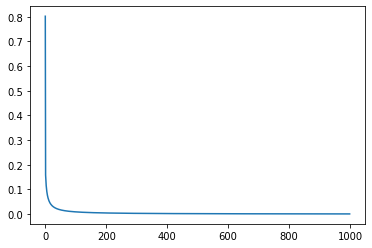

In [8]:
plt.plot(C)

Se puede ver de la gráfica que la población tiende a 0 con el paso del tiempo

$ r = 2 $

In [9]:
x = np.random.random()
r = 2
C = logistica(1000, r, x)

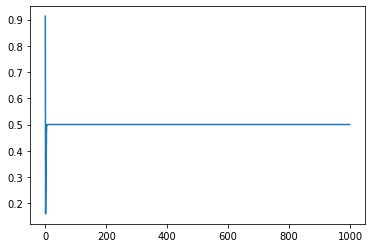

In [10]:
plt.plot(C)

De la gráfica anterior se puede ver que el sistema converge en un punto

In [11]:
x = np.random.random()
r = 3.1
C = logistica(1000, r, x)

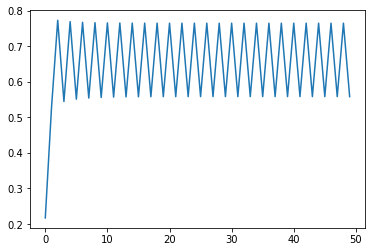

In [12]:
plt.plot(C[:50])

En este caso, cuando $r=3.1$ nuestro sistema dinámico se estabiliza entre dos valores

In [13]:
print(np.round(C[-14:],2))

[0.76 0.56 0.76 0.56 0.76 0.56 0.76 0.56 0.76 0.56 0.76 0.56 0.76 0.56]


$r = 3.5$

In [14]:
x = np.random.random()
r = 3.5
C = logistica(1000, r, x)

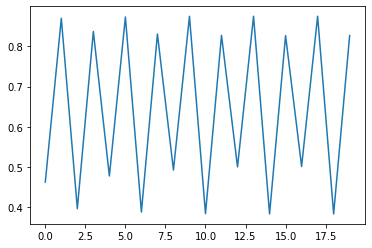

In [15]:
plt.plot(C[:20])

Y para este valor de $r$ puede verse que la población oscila entre algún subconjunto de valores. Cuando $r=3.5$ entonces nuestro sistema dinámico oscila entre 4 valores que son:

In [16]:
print(np.round(C[-10:],2))

[0.38 0.83 0.5  0.87 0.38 0.83 0.5  0.87 0.38 0.83]


Podemos ver que para distintos valores de $r$ la dinámica del sistema, después de transcurrido cierto tiempo, parece estabilizarse en algún conjunto de valores (al menos para estos ejemplos). Este subconjunto de valores es lo que denominamos un **atractor**.

> Roughly speaking, an attracting set for a dynamical system is a closed subset A of its phase space such that for "many" choices of initial point the system will evolve towards A .

Tomado de [Scholarpedia (Attractor)](http://www.scholarpedia.org/article/Attractor)

¿Cómo es la dinámica de este sistema para diferentes valores de $r$? Esto lo podemos hacer si vamos variando los valores de $r$ dentro de la logística (lo suficiente para asgeurar que estamos observando la dinámica estable a la que tiende el sistema) y graficando estos valores como la variable de respuesta de $r$.

In [17]:
def bifurcaciones(rango,step=0.005, n=500, k=250):
    #print("x0 ",x0)
    print("rango: ",rango[0],"-",rango[1])
    R = arange(rango[0],rango[1],step)
    m =(rango[1]-rango[0])/step
    m *= (n-k)
    #m += (n-k)
    S = zeros((int(m),2))
    #print(S.shape)
    i,j=0,0
    for r in R:
        #print "r {0}".format(r)
        x0 = np.random.rand()
        L = logistica(n, r, x0)
        for p in L[k+1:]:
            S[i]=(r,p)
            i += 1
    return S

B = bifurcaciones([0,4])
print(B.shape)

rango:  0 - 4
(200000, 2)


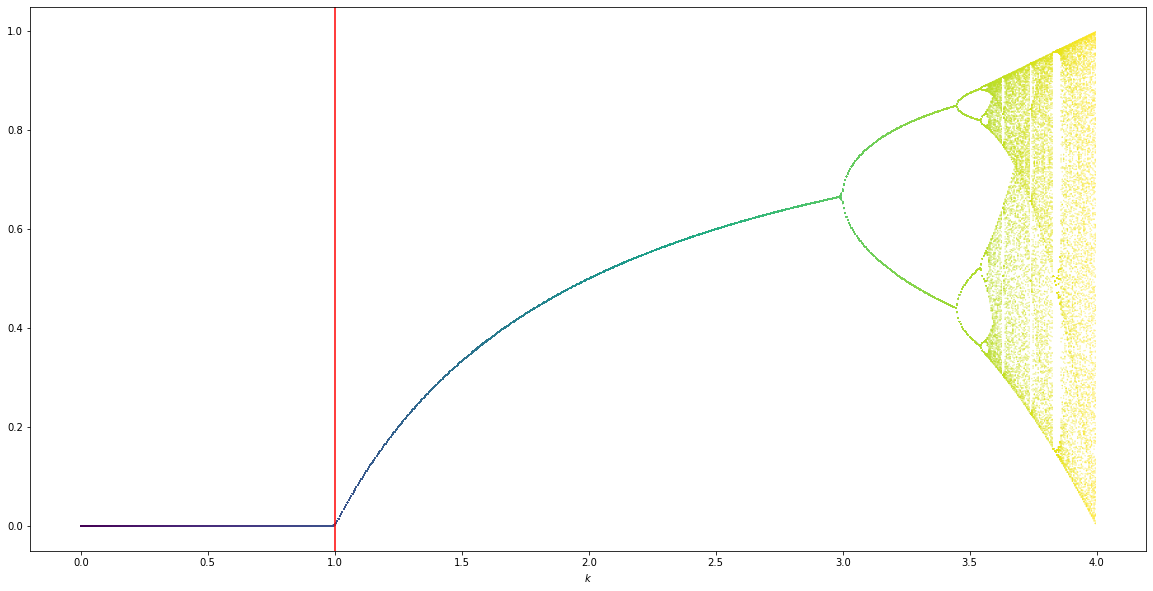

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel(r'$k$')
plt.axvline(x=1, c='r')
plt.axvline(x=3, c='r')
plt.axvline(x=, c='r')
ax = plt.scatter(B[:,0], B[:,1], s=0.05, c=B[:,0])

Para animar con celluloid podemos usar el siguiente código

```Python
fig, ax = plt.subplots(figsize=(20,10))
camera = Camera(fig)
ax = plt.axes(xlim=(0,4.1), ylim=(-0.05, 1.05))
of = 250
for i in range(0,len(B)-of):
    ax.scatter(B[of*i:of*i+of, 0], B[of*i:of*i+of, 1], 
               s=0.05, 
               c=B[of*i:of*i+of, 0])
    camera.snap()
anim = camera.animate()
```

In [19]:
HTML("""
    <video alt="test" controls>
        <source src="logisticmap.mp4" type="video/mp4" size=50%>
    </video>
""")